<a href="https://colab.research.google.com/github/carriestienen/Linguo2/blob/master/AdvancedMachineLearning_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Turn up!!!")

Turn up!!!


In [ ]:
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [31]:
from io import StringIO
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Scrapper

links = ["https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013",
         "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013",
         "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013",
         "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013",
         "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013",
         "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013"]

dfCodes = pd.DataFrame()
for link in links:
  dfTemp = pd.read_html(link)
  dfCodes = dfCodes.append(dfTemp)

dfCodes.head()

,Variable Name,Variable Description,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints
0,DLQ010,"With this next set of questions, we want to le...",DLQ_H,Disability,2013,2014,Questionnaire,None
1,DLQ020,{Are you/Is SP} blind or {do you/does he/does ...,DLQ_H,Disability,2013,2014,Questionnaire,None
2,DLQ040,"Because of a physical, mental, or emotional co...",DLQ_H,Disability,2013,2014,Questionnaire,None
3,DLQ050,{Do you/Does SP} have serious difficulty walki...,DLQ_H,Disability,2013,2014,Questionnaire,None
4,DLQ060,{Do you/Does SP} have difficulty dressing or b...,DLQ_H,Disability,2013,2014,Questionnaire,None


In [ ]:
# DIQ010 - Doctor told you have diabetes

# View Variable Names

for val in dfCodes['Variable Description'].unique():
  print(val)

With this next set of questions, we want to learn about people who have physical, mental, or emotional conditions that cause serious difficulties with their daily activities. Though different, these questions may sound similar to ones I asked earlier. {Are you/Is SP} deaf or {do you/does he/does she} have serious difficulty hearing?
{Are you/Is SP} blind or {do you/does he/does she} have serious difficulty seeing even when wearing glasses?
Because of a physical, mental, or emotional condition, {do you/does he/does she} have serious difficulty concentrating, remembering, or making decisions?
{Do you/Does SP} have serious difficulty walking or climbing stairs?
{Do you/Does SP} have difficulty dressing or bathing?
Because of a physical, mental, or emotional condition, {do you/does he/does she} have difficulty doing errands alone such as visiting a doctor's office or shopping?
Respondent sequence number.
If after several months of not being in the sun, {you/SP} then went out in the sun wit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data = pd.read_csv('/content/drive/My Drive/NHANES.csv')
data2 = pd.read_csv('/content/NHANES.csv')

In [ ]:
data2.head()

,Unnamed: 0,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [ ]:
# getData

orig_url = "https://drive.google.com/uc?export=download&id=1XrPnbUNcv3kzRBDOpfV0kNTNnxEDHTTT"
url = requests.get(orig_url)
csv_raw = StringIO(url.text)
dfs = pd.read_csv(csv_raw)
dfs = dfs.drop(columns=['Unnamed: 0'])
print(dfs.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1664) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  ...  WHQ150  WHQ030M  WHQ500  WHQ520
0  73557         8         2         1  ...    62.0      NaN     NaN     NaN
1  73558         8         2         1  ...    25.0      NaN     NaN     NaN
2  73559         8         2         1  ...    35.0      NaN     NaN     NaN
3  73560         8         2         1  ...     NaN      3.0     3.0     3.0
4  73561         8         2         2  ...    60.0      NaN     NaN     NaN

[5 rows x 1812 columns]


In [41]:
correlations = dfs.corr()

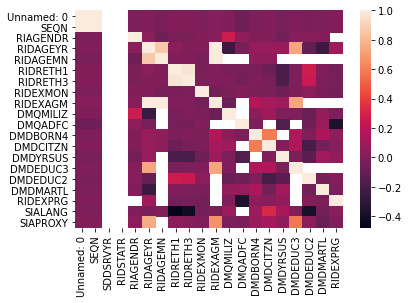

In [42]:
sns.heatmap(correlations.dropna(thresh=2).iloc[0:20, 0:20])

In [45]:
dupes = dfCodes.duplicated()

for line in dupes:
  print(line)

Streaming output truncated to the last 5000 lines.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F